## Titanic (Kaggle) Dataset: Machine Learning from disaster

### 1. Problem Definition:  
Develop an algorithm to predict the survival outcome of passengers on the Titanic.

### 2. Gather the Data:   
Datasets are already given along with the competition details.

### 3. Prepare Data for Consumption (Data Wrangling):

### 3.1 Import Libraries

In [1]:
import sys    # access to system parameters
print('Pyhton version: {}'.format(sys.version))

import pandas as pd # collection of functions for data processing and analysis
print('pandas version: {}'.format(pd.__version__))

import matplotlib # collection of functions for scientific and publication-ready visualization
# %matplotlib inline
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np # foundational package for scientific computing
print('NumPy version: {}'.format(np.__version__))

import scipy as sp # collection of functions for scientific computing and advance mathematics
print('SciPy version: {}'.format(sp.__version__))

import IPython
from IPython import display # pretty printing of dataframes in Jupyter notebook
print('IPython version: {}'.format(IPython.__version__))

import sklearn # collection of machine learning algorithms
print('scikit-learn version: {}'.format(sklearn.__version__))

# miscellaneous libraries
import random
import time

# ignore warning
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# from subprocess import check_output
# print(check_output(["ls", "C:/Users/dell/Titanic"]).decode("utf8"))

Pyhton version: 3.6.7 |Anaconda 4.4.0 (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 3.0.1
NumPy version: 1.15.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.2
-------------------------


#### 3.11 Load Data Modelling Libraries

In [2]:
#Common Model Algorithms
from sklearn import linear_model,svm, tree, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import metrics
from sklearn import model_selection

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] =12,8 

In [3]:
# print('Version:{}'.format(jedi.__version__))

# Disbaling 'jedi' to resolve the issue of auto completion
%config Completer.use_jedi = False

In [4]:
import IPython
print(IPython.sys_info())

{'commit_hash': '523ed2fe5',
 'commit_source': 'installation',
 'default_encoding': 'cp1252',
 'ipython_path': 'C:\\Users\\dell\\Anaconda3\\lib\\site-packages\\IPython',
 'ipython_version': '7.2.0',
 'os_name': 'nt',
 'platform': 'Windows-7-6.1.7601-SP1',
 'sys_executable': 'C:\\Users\\dell\\Anaconda3\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.6.7 |Anaconda 4.4.0 (64-bit)| (default, Oct 28 2018, '
                '19:44:12) [MSC v.1915 64 bit (AMD64)]'}


### 3.2 Meet and Greet Data

In [5]:
# load the data
train_T = pd.read_csv('C:/Users/dell/Titanic/train.csv')
test_T  = pd.read_csv('C:/Users/dell/Titanic/test.csv')

In [6]:
# To create copy assignment will not work as in python it only generate another reference not a copy 
train_copy = train_T.copy(deep = True)

**Merge the two data frames**

In [7]:
# Complete dataset
# titanic = [train_T, test_T]
# titanic = pd.DataFrame(titanic)     # in correct way to merge the dataframe
# titanic = pd.concat([train_T,test_T])
titanic = pd.merge(train_T,test_T, how = 'outer')

In [8]:
# print_dataunique(titanic)

In [9]:
type(titanic)

pandas.core.frame.DataFrame

In [10]:
# titanic['Survived']

In [11]:
titanic.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1289,1290,NaN,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
1290,1291,NaN,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
1292,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
1293,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1297,1298,NaN,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C


In [12]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


#### 3.21 The 4 C's of Data Cleaning: 
1. Correcting
2. Completing 
3. Creating 
4. Converting

In [13]:
print('Features having null values in titanic dataset:\n', titanic.isnull().sum())

Features having null values in titanic dataset:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [14]:
titanic.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            

In [15]:
# Grab the titles from the name column
import re
titanic['titles'] = [re.sub("(.*, )|(\\..*)", "", x) for x in titanic['Name']]   # list comprehension

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
titles         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [17]:
# titanic['Survived']

In [18]:
titanic.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
1289,1290,NaN,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S,Mr
1290,1291,NaN,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q,Mr
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,Miss
1292,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S,Mr
1293,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C,Miss
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,Mr
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,Mr
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,Mr
1297,1298,NaN,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S,Mr
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Mr


In [19]:
set(titanic.titles)  # unique values of titles (does not maintain the order)

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [20]:
# Another way to identify the unique values in a ordered manner
from collections import OrderedDict
OrderedDict((x, True) for x in titanic.titles).keys()

odict_keys(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona'])

In [21]:
# title frequency
titanic.titles.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
the Countess      1
Lady              1
Capt              1
Mme               1
Don               1
Dona              1
Sir               1
Jonkheer          1
Name: titles, dtype: int64

In [22]:
# list of rare titles
rare_titles = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Dona']

In [23]:
# replace the common title with the differnt abbreiviation to the similar one
titanic.titles.replace('Mme','Mrs', inplace = True)
titanic.titles.replace('Ms','Miss', inplace = True)
titanic.titles.replace('Mlle','Miss', inplace = True)

In [24]:
# replacing the uncommon title with the rare title category
titanic.titles.replace(rare_titles,'Rare title', inplace = True)

In [25]:
titanic.titles.value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Rare title     29
Name: titles, dtype: int64

In [26]:
titanic.groupby(['Sex', 'titles']).size()

Sex     titles    
female  Miss          264
        Mrs           198
        Rare title      4
male    Master         61
        Mr            757
        Rare title     25
dtype: int64

**New column 'Surname' using "pd.Series.str.split"**

In [27]:
# Create a new column 'Surname'
titanic['SurName']  = titanic['Name'].str.split(',', n=1, expand = True)[0]   # expand = True create a data frame with 2 column, here accepting only the 1st column

In [28]:
titanic.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles,SurName
473,474,1.0,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C,Mrs,Jerwan
321,322,0.0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S,Mr,Danoff
318,319,1.0,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S,Miss,Wick
1258,1259,NaN,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S,Miss,Riihivouri
903,904,NaN,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,Mrs,Snyder
130,131,0.0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C,Mr,Drazenoic
1275,1276,NaN,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S,Mr,Wheeler
548,549,0.0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S,Mr,Goldsmith
1201,1202,NaN,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S,Mr,Cacic
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer


In [29]:
# Number of persons with Unique surname
len(set(titanic.SurName))

875

In [30]:
# create a new column named- Family size
titanic['FamSize'] = titanic.SibSp + titanic.Parch + 1  # 1 for adding self

In [31]:
titanic.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles,SurName,FamSize
73,74,0.0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,Mr,Chronopoulos,2
1120,1121,NaN,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S,Mr,Hocking,1
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Fortune,6
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr,O'Connell,1
1000,1001,NaN,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S,Mr,Swane,1
1201,1202,NaN,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,8.6625,NaN,S,Mr,Cacic,1
500,501,0.0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S,Mr,Calic,1
908,909,NaN,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C,Mr,Assaf,1
221,222,0.0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S,Mr,Bracken,1
367,368,1.0,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Mrs,Moussa,1


In [32]:
# New column IsAlone if the person is alone (with family) on the titanic
titanic['IsAlone'] = 0
titanic.loc[titanic['FamSize'] == 1, 'IsAlone'] = 1

### Missing value analysis

**New variable - deck from the available column - cabin**

In [33]:
#titanic['Cabin'].str.split(n=1, expand = True)
titanic.loc[titanic['Cabin'].notnull(), 'deck'] = titanic['Cabin'].str[0]

In [34]:
titanic.deck.value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: deck, dtype: int64

In [35]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
titles            0
SurName           0
FamSize           0
IsAlone           0
deck           1014
dtype: int64

In [36]:
# row index where the embarked column has blank entry
np.where(pd.isnull(titanic.Embarked))

(array([ 61, 829], dtype=int64),)

In [37]:
print(titanic.iloc[61,11])
print('-'*10)
print(titanic.iloc[829,11])

nan
----------
nan


In [38]:
# Fare and Class data with blanked 'Embarked' entry
print('Fare at the 1st blank Embarked entry:',titanic.iloc[61,9])
print('-'*10)
print('Class of the 1st blank Embarked entry:',titanic.iloc[61,2])
print('-'*10)
print('Fare at the 2nd blank Embarked entry:',titanic.iloc[829,9])
print('-'*10)
print('Class of the 2nd blank Embarked entry:',titanic.iloc[829,2])

Fare at the 1st blank Embarked entry: 80.0
----------
Class of the 1st blank Embarked entry: 1
----------
Fare at the 2nd blank Embarked entry: 80.0
----------
Class of the 2nd blank Embarked entry: 1


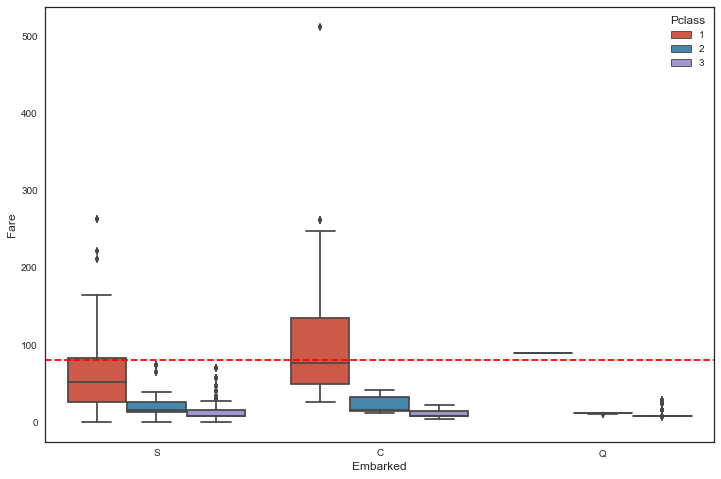

In [39]:
sns.boxplot('Embarked', 'Fare', data = titanic, hue = 'Pclass')
plt.axhline(y=80, color='r', linestyle='--', linewidth = 1.8)
plt.show()

**From the above plot, passengers of class 1 generally (median) paid $80 and embarked from Charbourg, so the blank entries can be filled by 'C' - Charbourg.**

In [40]:
# replace the blank embark entry with the 'C'
titanic.iloc[[61,829],11] = 'C'
#titanic.Embarked.replace('NaN','C', inplace = True)
print(titanic.iloc[[61,829],11])

61     C
829    C
Name: Embarked, dtype: object


In [41]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
titles            0
SurName           0
FamSize           0
IsAlone           0
deck           1014
dtype: int64

In [42]:
# row index where the fare column has blank entry
np.where(pd.isnull(titanic.Fare))

(array([1043], dtype=int64),)

In [43]:
titanic.iloc[1043,9]

nan

In [44]:
titanic.iloc[1043,]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
titles                         Mr
SurName                    Storey
FamSize                         1
IsAlone                         1
deck                          NaN
Name: 1043, dtype: object

**Blank fare value can be filled using the median fare value of class 3 passengers embarked from 'S' - Southempton**

In [45]:
titanic.iloc[1043,9] = titanic.Fare.loc[(titanic.Pclass == 3) & (titanic.Embarked == 'S')].median()

In [46]:
titanic.iloc[1043,9]

8.05

In [47]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
titles            0
SurName           0
FamSize           0
IsAlone           0
deck           1014
dtype: int64

In [48]:
# from fancyimpute import KNN

In [49]:
# Imputing the age values
age_avg = titanic['Age'].mean()
age_std = titanic['Age'].std()

In [50]:
age_null_count = titanic['Age'].isnull().sum()

In [51]:
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)    

In [52]:
titanic['Age'][np.isnan(titanic['Age'])] = age_null_random_list

In [53]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
titles            0
SurName           0
FamSize           0
IsAlone           0
deck           1014
dtype: int64

**Mapping the variable**

In [54]:
titanic['Sex'] = titanic['Sex'].map({'female':0, 'male':1}).astype(int)

In [55]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
titanic['titles'] = titanic['titles'].map(title_mapping)
titanic['titles'] = titanic['titles'].fillna(0)
titanic['titles'] = titanic['titles'].astype(int)

In [56]:
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [57]:
# even distribution of fare column
pd.qcut(train_T['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
5       (7.91, 14.454]
6      (31.0, 512.329]
7       (14.454, 31.0]
8       (7.91, 14.454]
9       (14.454, 31.0]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (7.91, 14.454]
13     (31.0, 512.329]
14      (-0.001, 7.91]
15      (14.454, 31.0]
16      (14.454, 31.0]
17      (7.91, 14.454]
18      (14.454, 31.0]
19      (-0.001, 7.91]
20      (14.454, 31.0]
21      (7.91, 14.454]
22      (7.91, 14.454]
23     (31.0, 512.329]
24      (14.454, 31.0]
25     (31.0, 512.329]
26      (-0.001, 7.91]
27     (31.0, 512.329]
28      (-0.001, 7.91]
29      (-0.001, 7.91]
            ...       
861     (7.91, 14.454]
862     (14.454, 31.0]
863    (31.0, 512.329]
864     (7.91, 14.454]
865     (7.91, 14.454]
866     (7.91, 14.454]
867    (31.0, 512.329]
868     (7.91, 14.454]
869     (7.91, 14.454]
870     (-0.001, 7.91]
871    (31.0, 512.329]
872     (-0.001, 7.91]
873     (7.

In [58]:
# Binning of Fare variable
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare']                                  = 0
titanic.loc[(titanic['Fare'] > 7.91)   & (titanic['Fare'] <= 14.454), 'Fare']  = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']      = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare']                                     = 3
titanic['Fare'] = titanic['Fare'].astype(int)

In [59]:
# Bins according to the values
pd.cut(train_T['Age'], 5).value_counts()

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [60]:
titanic.loc[ titanic['Age'] <= 16, 'Age']                           = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age']  = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age']  = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age']  = 3
titanic.loc[ titanic['Age'] > 64, 'Age']                            = 4
titanic['Age'] = titanic['Age'].astype(int)

In [61]:
titanic['Survived']

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
5       0.0
6       0.0
7       0.0
8       1.0
9       1.0
10      1.0
11      1.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      0.0
19      1.0
20      0.0
21      1.0
22      1.0
23      1.0
24      0.0
25      1.0
26      0.0
27      0.0
28      1.0
29      0.0
       ... 
1279    NaN
1280    NaN
1281    NaN
1282    NaN
1283    NaN
1284    NaN
1285    NaN
1286    NaN
1287    NaN
1288    NaN
1289    NaN
1290    NaN
1291    NaN
1292    NaN
1293    NaN
1294    NaN
1295    NaN
1296    NaN
1297    NaN
1298    NaN
1299    NaN
1300    NaN
1301    NaN
1302    NaN
1303    NaN
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [62]:
# titanic.info()

In [63]:
titanic.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles,SurName,FamSize,IsAlone,deck
769,770,0.0,3,"Gronnestad, Mr. Daniel Danielsen",1,1,0,0,8471,1,NaN,0,1,Gronnestad,1,1,NaN
371,372,0.0,3,"Wiklund, Mr. Jakob Alfred",1,1,1,0,3101267,0,NaN,0,1,Wiklund,2,0,NaN
1079,1080,NaN,3,"Sage, Miss. Ada",0,1,8,2,CA. 2343,3,NaN,0,2,Sage,11,0,NaN
854,855,0.0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",0,2,1,0,244252,2,NaN,0,3,Carter,2,0,NaN
551,552,0.0,2,"Sharp, Mr. Percival James R",1,1,0,0,244358,2,NaN,0,1,Sharp,1,1,NaN
889,890,1.0,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,2,C148,1,1,Behr,1,1,C
223,224,0.0,3,"Nenkoff, Mr. Christo",1,1,0,0,349234,0,NaN,0,1,Nenkoff,1,1,NaN
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",0,2,0,5,382652,2,NaN,2,3,Rice,6,0,NaN
63,64,0.0,3,"Skoog, Master. Harald",1,0,3,2,347088,2,NaN,0,4,Skoog,6,0,NaN
845,846,0.0,3,"Abbing, Mr. Anthony",1,2,0,0,C.A. 5547,0,NaN,0,1,Abbing,1,1,NaN


**Dropping unnecessary features**

In [64]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'deck', 'SurName', 'SibSp', 'Parch']

In [65]:
titanic = titanic.drop(drop_elements, axis = 1)

In [66]:
# titanic['Survived']

In [67]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [68]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [69]:
# titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending=False)

In [70]:
# titanic[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending=False)

### 4: Perform Exploratory Analysis with Statistics

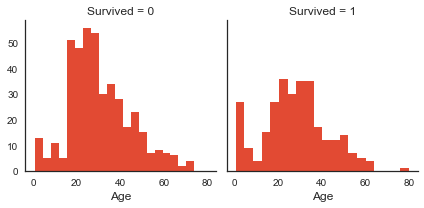

In [71]:
g = sns.FacetGrid(train_T, col = 'Survived')
g.map(plt.hist, 'Age', bins= 20)

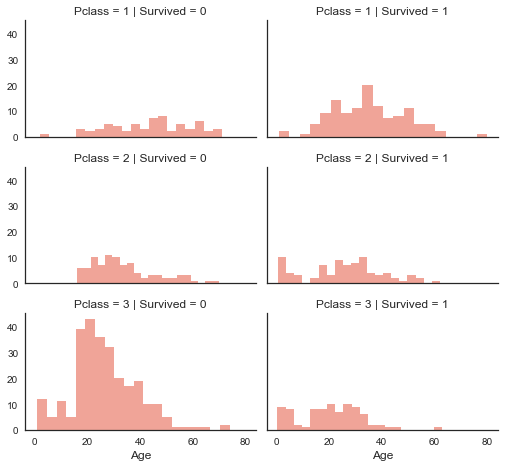

In [72]:
grid = sns.FacetGrid(train_T, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend();

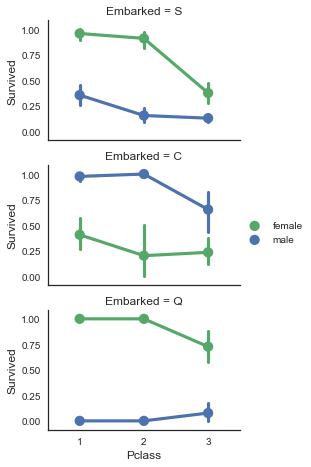

In [73]:
grid = sns.FacetGrid(train_T, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

**1. Females had higher rate of survival.**  
**2. Class 1 passengers had higher survival rate.**

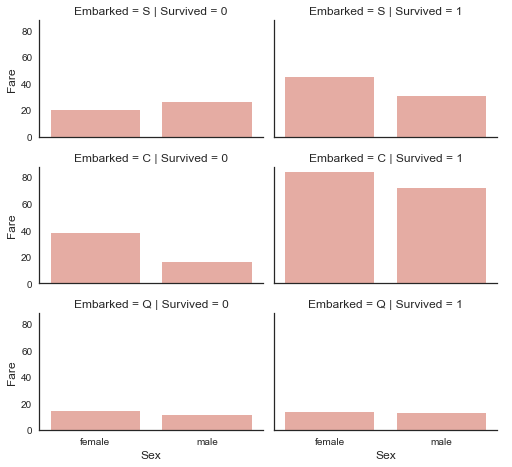

In [74]:
grid = sns.FacetGrid(train_T, row = 'Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5,ci = None)
grid.add_legend()

**As per the above graph, passengers who paid higher amount (class 1), had higher survival rate.**

#### Pearson correleation heatmap

In [75]:
train_F = titanic.iloc[:891,]

In [76]:
x = titanic.iloc[:891,]

In [77]:
train_F['Survived']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [78]:
#test_F['Survived']

In [79]:
# Feature engineered train and testing datasets
train_F = titanic.iloc[:891]
test_F  = titanic.iloc[891::]

In [80]:
len(train_F)

891

In [81]:
#train_F

In [82]:
#train_F

In [83]:
#train_F['Survived']

### Important:  
**Sklearn requires the data shape of (row number, column number). If your data shape is (row number, ) like (999, ), it does not work.**

In [84]:
X_train = train_F.drop('Survived', axis = 1)
y_train = train_F['Survived']
X_test  = test_F.drop("Survived", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [85]:
len(X_train)

891

In [86]:
len(y_train)

891

In [87]:
# y_train = y_train.to_frame((891,1))

In [88]:
train_F['Survived'].shape

(891,)

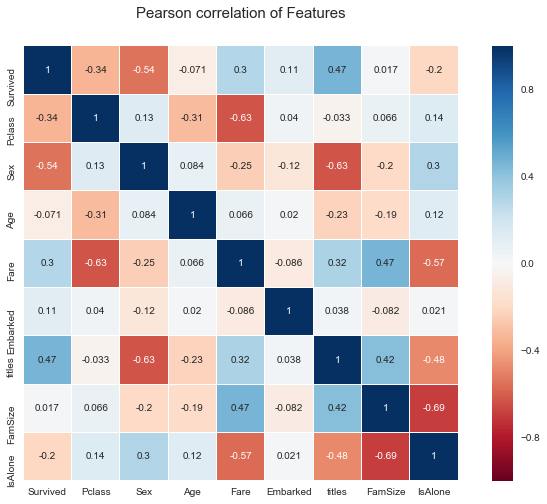

In [89]:
colormap = plt.cm.RdBu
plt.title('Pearson correlation of Features', y= 1.05, size = 15)
sns.heatmap(train_F.astype(float).corr(),
           linewidth = 0.1,
           vmax = 1.0,
           square = True,
           cmap = colormap,
           linecolor = 'white',
           annot = True)

### 5: Model Data

### Feature importances generated from the different classifiers

In [90]:
MLA = [
    # Ensemble methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    # gaussian_process.GaussianProcessClassifier(),
    
    # Genealized linear model (GLM)
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest neighbour
    neighbors.KNeighborsClassifier(),
    
    # Support vector machine (SVM)
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # xgboost
    XGBClassifier()
]

In [91]:
MLA

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=None),
 BaggingClassifier(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity

**Cross-Validation**

In [92]:
cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'titles', 'FamSize', 'IsAlone']

In [93]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=0)

In [94]:
# ?model_selection.ShuffleSplit

In [95]:
# ?model_selection.cross_validate

In [96]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name',
              'MLA Parameters',
              'MLA train accuracy mean',
              'MLA test accuracy mean',
              'MLA test accuracy 3*STD',
              'MLA Time']
 
MLA_compare = pd.DataFrame(columns=MLA_columns)
MLA_predict = train_F['Survived']

In [97]:
# MLA_predict

In [98]:
# MLA_compare

In [99]:
# index through MLA and save performance to table
row_index = 0
for alg in MLA:
    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name   # name of algorithm
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time']                 = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA train accuracy mean']  = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA test accuracy mean']   = cv_results['test_score'].mean()
    
    # if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    # should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA test accuracy 3*STD']  = cv_results['test_score'].std()*3
    
   # alg.fit(X_train, y_train)
   # MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index += 1

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

In [100]:
len(y_train)

891

In [101]:
MLA_compare.sort_values(by = ['MLA test accuracy mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA train accuracy mean,MLA test accuracy mean,MLA test accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.835152,0.832836,0.044439,0.0835229
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.829695,0.829851,0.0451107,0.0928216
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.831782,0.827612,0.0435849,0.0705014
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.862119,0.825746,0.0403762,0.438313
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.828571,0.825,0.0460046,0.0176005
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.8313,0.824627,0.0525047,0.0143008
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.826966,0.824254,0.056516,0.227828
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.846549,0.821269,0.0449019,0.0796611
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.886998,0.819403,0.0599064,0.01716
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.85939,0.817537,0.0509175,0.135503


Text(0, 0.5, 'Algorithms')

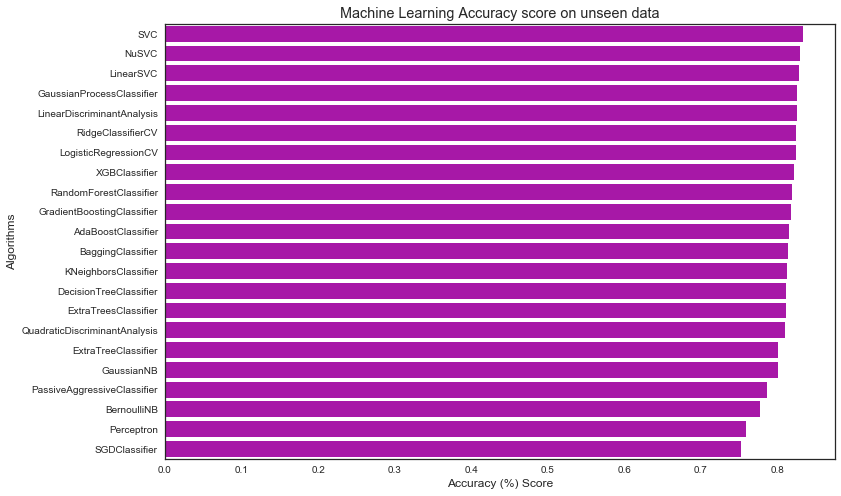

In [102]:
# Visualise the cross validation results
sns.barplot(x = 'MLA test accuracy mean',
           y = 'MLA Name',
           data = MLA_compare,
           color = 'm')

plt.title('Machine Learning Accuracy score on unseen data')
plt.xlabel('Accuracy (%) Score')
plt.ylabel('Algorithms')

In [103]:
pivot_female = train_T[train_T.Sex == 'female'].groupby(['Sex', 'Pclass', 'Embarked'])['Survived'].mean()

In [104]:
print('Survival of female:\n', pivot_female)

Survival of female:
 Sex     Pclass  Embarked
female  1       C           0.976744
                Q           1.000000
                S           0.958333
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
Name: Survived, dtype: float64


In [105]:
pivot_male = train_T[train_T.Sex == 'male'].groupby(['Sex', 'Pclass', 'Embarked'])['Survived'].mean()

In [106]:
print('Survival of male:\n', pivot_male)

Survival of male:
 Sex   Pclass  Embarked
male  1       C           0.404762
              Q           0.000000
              S           0.354430
      2       C           0.200000
              Q           0.000000
              S           0.154639
      3       C           0.232558
              Q           0.076923
              S           0.128302
Name: Survived, dtype: float64


**Logistic Regression**

In [107]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

82.72

In [108]:
coeff_df = pd.DataFrame(train_F.columns.delete(0)) # make new index with passed location deleted.

In [109]:
coeff_df.columns = ['Feature']

In [110]:
coeff_df

,Feature
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,titles
6,FamSize
7,IsAlone


In [111]:
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

In [112]:
coeff_df.sort_values(by = 'Correlation', ascending=False)

,Feature,Correlation
5,titles,0.998484
4,Embarked,0.335808
3,Fare,0.287398
7,IsAlone,-0.123964
2,Age,-0.345735
6,FamSize,-0.494404
0,Pclass,-0.881101
1,Sex,-1.659828


In [113]:
# cnf_matrix_LR = metrics.confusion_matrix(test_y, prediction)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Support vector machine

In [114]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_train)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc

83.5

In [115]:
#print('w = ',svc.coef_)
print('-'*45)
print('b = ',svc.intercept_)
print('-'*45)
print('Indices of support vectors = ', svc.support_)
print('-'*45)
print('Support vectors = ', svc.support_vectors_)
print('-'*45)
print('Number of support vectors for each class = ', svc.n_support_)
print('-'*45)
print('Coefficients of the support vector in the decision function = ', np.abs(svc.dual_coef_))

---------------------------------------------
b =  [-0.4341189]
---------------------------------------------
Indices of support vectors =  [  7  14  18  24  27  34  38  40  41  46  49  54  62  64  71  72  92 100
 101 102 111 113 114 118 132 137 139 140 147 154 155 159 167 168 169 176
 177 185 188 199 205 229 235 240 245 246 251 252 254 262 264 270 273 276
 278 280 284 293 295 297 312 324 331 332 333 336 352 357 362 373 374 377
 385 396 402 404 409 415 419 423 434 436 438 452 456 463 467 474 475 480
 485 487 492 493 498 501 502 503 505 515 527 529 534 536 544 545 555 557
 563 564 566 567 574 575 578 582 583 586 593 602 617 624 625 629 633 637
 638 648 654 657 659 662 666 671 672 678 680 684 685 693 694 698 702 703
 705 711 721 722 729 731 733 734 735 736 741 745 746 748 749 752 758 760
 764 767 768 772 782 787 789 790 791 793 794 795 798 799 800 805 807 808
 810 811 812 814 815 816 817 824 825 826 833 834 836 837 841 846 851 852
 854 859 867 868 870 872 873 877 878 882 884 885 888 890 

**KNN Algorithm**

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,y_train)*100,2)
acc_knn

81.71

** Gaussian Naive Bayes**

In [117]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian

79.91

**Perceptron**

In [118]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100,2)
acc_perceptron

80.7

**Linear SVC**

In [119]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,y_train)*100, 2)
acc_linear_svc

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


82.83

**Stochastic Gradient Descent**

In [120]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,y_train)*100,2)
acc_sgd

80.7

**Decision Tree**

In [121]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

88.89

**Random Forest**

In [122]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
acc_random_forest

88.55

**AdaBoost**

In [123]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
acc_adaboost = round(adaboost.score(X_train, y_train)*100, 2)
acc_adaboost

82.15

### Model Evaluaion

In [124]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Support Vector Machine',
            'Stocastic Gradient Decent', 'KNN', 'Perceptron',
            'Decision Tree', 'Random Forest', 'Naive Bayes',
            'Linear SVC'],
    'Score':[acc_log, acc_svc,
            acc_sgd, acc_knn, acc_perceptron,
            acc_decision_tree, acc_random_forest, acc_gaussian,
            acc_linear_svc]
})

In [125]:
models.sort_values(by= 'Score', ascending=False)

,Model,Score
5,Decision Tree,88.89
6,Random Forest,88.55
1,Support Vector Machine,83.50
8,Linear SVC,82.83
0,Logistic Regression,82.72
3,KNN,81.71
2,Stocastic Gradient Decent,80.70
4,Perceptron,80.70
7,Naive Bayes,79.91


In [126]:
rf_feature = random_forest.feature_importances_

In [127]:
rf_feature

array([0.14373505, 0.15882258, 0.11394805, 0.09955856, 0.05474241,
       0.29464927, 0.1181376 , 0.01640648])

In [128]:
# Dataframe to plot to the feature importance plot using plotly
cols = X_train.columns.values

In [129]:
feature_df = pd.DataFrame({'features': cols,
                          'Random forest feature importances': rf_feature})

In [130]:
# Import plotly packages
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [131]:
trace = go.Scatter(
    y = feature_df['Random forest feature importances'].values,
    x = feature_df['features'].values,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_df['Random forest feature importances'].values,
        colorscale = 'Portland',
        showscale = True
    ),
    text = feature_df['features'].values
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random forest feature importances',
    hovermode = 'closest',
    yaxis = dict(
        title = 'Feature Importance',
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Scatter Plot')

### Plotting outcome of Decision Tree

In [132]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [133]:
dot_data = StringIO()
cols = X_train.columns.values

In [134]:
# Create DOT data
export_graphviz(decision_tree,
               feature_names = cols,
               class_names = ['Dead', 'Survived'],  # class label in ascending numerical order
               out_file = dot_data,
               filled = True,
               rounded = True,
               special_characters = True)

In [135]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

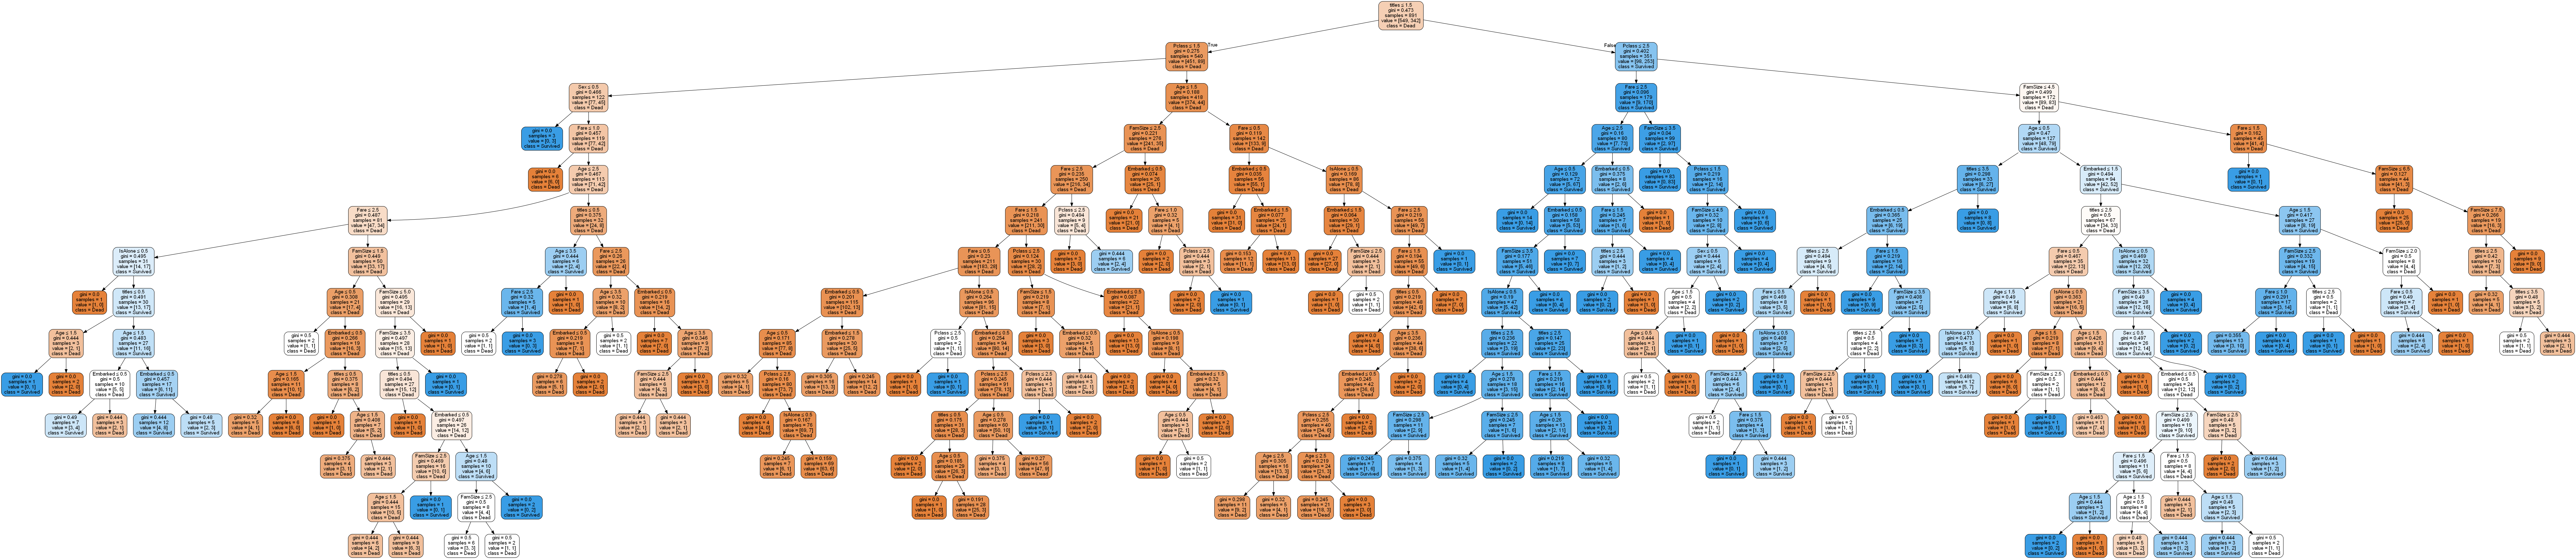

In [136]:
Image(graph.create_png())

### Cross validation

In [137]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.7, random_state=1234)

In [138]:
model_selection.cross_validate(adaboost,   # estimator
                              X = X_train,
                              y = y_train,
                              scoring = None,       # matrix to produce test set score
                              #scoring = ('r2', 'neg_mean_squared_error'),
                              cv = cv_split,
                              n_jobs = 1)           # No. of computer cores provided for processing

{'fit_time': array([0.12400699, 0.1488061 , 0.12500715, 0.12820578, 0.11000609,
        0.09800577, 0.10000563, 0.08900499, 0.10200167, 0.1242013 ]),
 'score_time': array([0.01559997, 0.01800084, 0.01700091, 0.01300049, 0.01500106,
        0.01200056, 0.01500082, 0.0156002 , 0.        , 0.01500082]),
 'test_score': array([0.82462687, 0.83208955, 0.82089552, 0.75746269, 0.81716418,
        0.78358209, 0.76492537, 0.81343284, 0.85074627, 0.79477612]),
 'train_score': array([0.81219904, 0.82504013, 0.82022472, 0.83306581, 0.82182986,
        0.82985554, 0.84269663, 0.82985554, 0.79454254, 0.81861958])}

In [139]:
# ?model_selection.cross_validate

In [140]:
# another way to get the cross validation score
from sklearn.model_selection import cross_val_score
model_selection.cross_val_score(random_forest, X_train, y_train, cv=cv_split, n_jobs = 1)

array([0.81343284, 0.82835821, 0.79104478, 0.78358209, 0.83208955,
       0.79104478, 0.7761194 , 0.82089552, 0.84701493, 0.77985075])

### Tuning Parameters using GridSearchCV

In [141]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
dtree_CV = model_selection.cross_validate(decision_tree, X= X_train, y=y_train, cv = cv_split)

In [143]:
print('DT parameters without tuning: ', decision_tree.get_params())
print('DT training score mean without tuning:{:0.2f}'.format((dtree_CV['train_score'].mean())*100))
print('DT testing score mean without tuning:{:0.2f}'.format((dtree_CV['test_score'].mean())*100))
print('DT testing score 3*std without tuning: +/- {:0.2f}'.format((dtree_CV['test_score'].std())*100*3))
print('-'*50)

DT parameters without tuning:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
DT training score mean without tuning:89.95
DT testing score mean without tuning:79.93
DT testing score 3*std without tuning: +/- 6.04
--------------------------------------------------


In [144]:
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[2,4,6,8,10,None],
              'random_state': [0]
             }

In [145]:
tune_model = model_selection.GridSearchCV(decision_tree, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1234, test_size=0.3, train_size=0.7),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [146]:
print('DT parameters with tuning: ', tune_model.best_params_)
print('DT training score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('DT testing score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('DT testing score 3*std with tuning: +/- {:0.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*50)

DT parameters with tuning:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
DT training score mean with tuning:90.07
DT testing score mean with tuning:86.73
DT testing score 3*std with tuning: +/- 5.88
--------------------------------------------------


In [147]:
print('DT parameters without tuning: ', decision_tree.get_params())
print('-'*50)
print('DT training score mean without tuning:{:0.2f}'.format((dtree_CV['train_score'].mean())*100))
print('DT testing score mean without tuning:{:0.2f}'.format((dtree_CV['test_score'].mean())*100))
print('DT testing score 3*std without tuning: +/- {:0.2f}'.format((dtree_CV['test_score'].std())*100*3))
print('-'*50)
print('DT parameters with tuning: ', tune_model.best_params_)
print('DT training score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('DT testing score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('DT testing score 3*std with tuning: +/- {:0.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*50)

DT parameters without tuning:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
--------------------------------------------------
DT training score mean without tuning:89.95
DT testing score mean without tuning:79.93
DT testing score 3*std without tuning: +/- 6.04
--------------------------------------------------
DT parameters with tuning:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
DT training score mean with tuning:90.07
DT testing score mean with tuning:86.73
DT testing score 3*std with tuning: +/- 5.88
--------------------------------------------------


### Tune Model with Feature Selection: Using recursive feature elimination (RFE) with cross validation (CV)

In [148]:
print('Befor RFE Training data shape Old: ', X_train.shape)
print('Befor RFE Training data columns Old: ', X_train.columns.values)
print('DT training score mean without RFE:{:0.2f}'.format((dtree_CV['train_score'].mean())*100))
print('DT testing score mean without RFE:{:0.2f}'.format((dtree_CV['test_score'].mean())*100))
print('DT testing score 3*std without RFE: +/- {:0.2f}'.format((dtree_CV['test_score'].std())*100*3))
print('-'*50)

Befor RFE Training data shape Old:  (891, 8)
Befor RFE Training data columns Old:  ['Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'titles' 'FamSize' 'IsAlone']
DT training score mean without RFE:89.95
DT testing score mean without RFE:79.93
DT testing score 3*std without RFE: +/- 6.04
--------------------------------------------------


In [149]:
# Feature selection
from sklearn import feature_selection
dtree_rfe = feature_selection.RFECV(decision_tree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X_train, y_train)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=1234, test_size=0.3, train_size=0.7),
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [150]:
X_rfe = X_train.columns.values[dtree_rfe.get_support()]

In [151]:
X_rfe

array(['Pclass', 'titles', 'FamSize'], dtype=object)

In [152]:
rfe_results = model_selection.cross_validate(decision_tree, X = train_F[X_rfe], y = y_train, cv = cv_split)

In [153]:
print('-'*50)
print('After RFE Training data shape New: ', train_F[X_rfe].shape)
print('Befor RFE Training data columns Old: ', X_rfe)
print('DT training score mean with RFE:{:0.2f}'.format((rfe_results['train_score'].mean())*100))
print('DT testing score mean with RFE:{:0.2f}'.format((rfe_results['test_score'].mean())*100))
print('DT testing score 3*std with RFE: +/- {:0.2f}'.format((rfe_results['test_score'].std())*100*3))
print('-'*50)

--------------------------------------------------
After RFE Training data shape New:  (891, 3)
Befor RFE Training data columns Old:  ['Pclass' 'titles' 'FamSize']
DT training score mean with RFE:84.19
DT testing score mean with RFE:81.01
DT testing score 3*std with RFE: +/- 7.38
--------------------------------------------------


In [154]:
rfe_tune_model =model_selection.GridSearchCV(decision_tree, param_grid=param_grid,
                                            scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(train_F[X_rfe], y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1234, test_size=0.3, train_size=0.7),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [155]:
print('DT parameters with RFE & tuning: ', rfe_tune_model.best_params_)
print('DT training score mean with RFE & tuning:{:0.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100))
print('DT testing score mean with RFE & tuning:{:0.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print('DT testing score 3*std with RFE & tuning: +/- {:0.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))
print('-'*50)

DT parameters with RFE & tuning:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
DT training score mean with RFE & tuning:89.16
DT testing score mean with RFE & tuning:87.00
DT testing score 3*std with RFE & tuning: +/- 5.06
--------------------------------------------------


In [156]:
print('-'*50)
print('Befor RFE Training data shape Old: ', X_train.shape)
print('Befor RFE Training data columns Old: ', X_train.columns.values)
print('DT training score mean without RFE:{:0.2f}'.format((dtree_CV['train_score'].mean())*100))
print('DT testing score mean without RFE:{:0.2f}'.format((dtree_CV['test_score'].mean())*100))
print('DT testing score 3*std without RFE: +/- {:0.2f}'.format((dtree_CV['test_score'].std())*100*3))
print('-'*50)
print('DT parameters with tuning: ', tune_model.best_params_)
print('DT training score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('DT testing score mean with tuning:{:0.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('DT testing score 3*std with tuning: +/- {:0.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

print('-'*50)
print('After RFE Training data shape New: ', train_F[X_rfe].shape)
print('After RFE Training data columns New: ', X_rfe)
print('DT training score mean with RFE:{:0.2f}'.format((rfe_results['train_score'].mean())*100))
print('DT testing score mean with RFE:{:0.2f}'.format((rfe_results['test_score'].mean())*100))
print('DT testing score 3*std with RFE: +/- {:0.2f}'.format((rfe_results['test_score'].std())*100*3))
print('-'*50)
print('DT parameters with RFE & tuning: ', rfe_tune_model.best_params_)
print('DT training score mean with RFE & tuning:{:0.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100))
print('DT testing score mean with RFE & tuning:{:0.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print('DT testing score 3*std with RFE & tuning: +/- {:0.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))
print('-'*50)

--------------------------------------------------
Befor RFE Training data shape Old:  (891, 8)
Befor RFE Training data columns Old:  ['Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'titles' 'FamSize' 'IsAlone']
DT training score mean without RFE:89.95
DT testing score mean without RFE:79.93
DT testing score 3*std without RFE: +/- 6.04
--------------------------------------------------
DT parameters with tuning:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
DT training score mean with tuning:90.07
DT testing score mean with tuning:86.73
DT testing score 3*std with tuning: +/- 5.88
--------------------------------------------------
After RFE Training data shape New:  (891, 3)
After RFE Training data columns New:  ['Pclass' 'titles' 'FamSize']
DT training score mean with RFE:84.19
DT testing score mean with RFE:81.01
DT testing score 3*std with RFE: +/- 7.38
--------------------------------------------------
DT parameters with RFE & tuning:  {'criterion': 'gini', 'max_depth': 4, '

In [157]:
# Decision tree
#from sklearn.tree import DecisionTreeClassifier
decision_tree_tuned = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4 , random_state=0 )
decision_tree_tuned.fit(X_train, y_train)
y_pred = decision_tree_tuned.predict(X_test)
acc_decision_tree_tuned = round(decision_tree_tuned.score(X_train, y_train) * 100, 2)
acc_decision_tree_tuned

83.5

In [158]:
print('DT Model accuracy on test data without tuning(default parameters): {:0.2f}'.format(acc_decision_tree))
print('DT Model accuracy on test data with tuning(tuned parameters): {:0.2f}'.format(acc_decision_tree_tuned))

DT Model accuracy on test data without tuning(default parameters): 88.89
DT Model accuracy on test data with tuning(tuned parameters): 83.50


**Important note:** The accuracy score after the tuning is showing **less accurate** result then the default one because we have tuned the model **against the 'roc_auc' matrix**, not with 'accuracy' matrix and we are comparing it with the result of accuracy matrix.  
**Tuning parameters** will give the **best results with the corresponding matrix**, not with all of them.

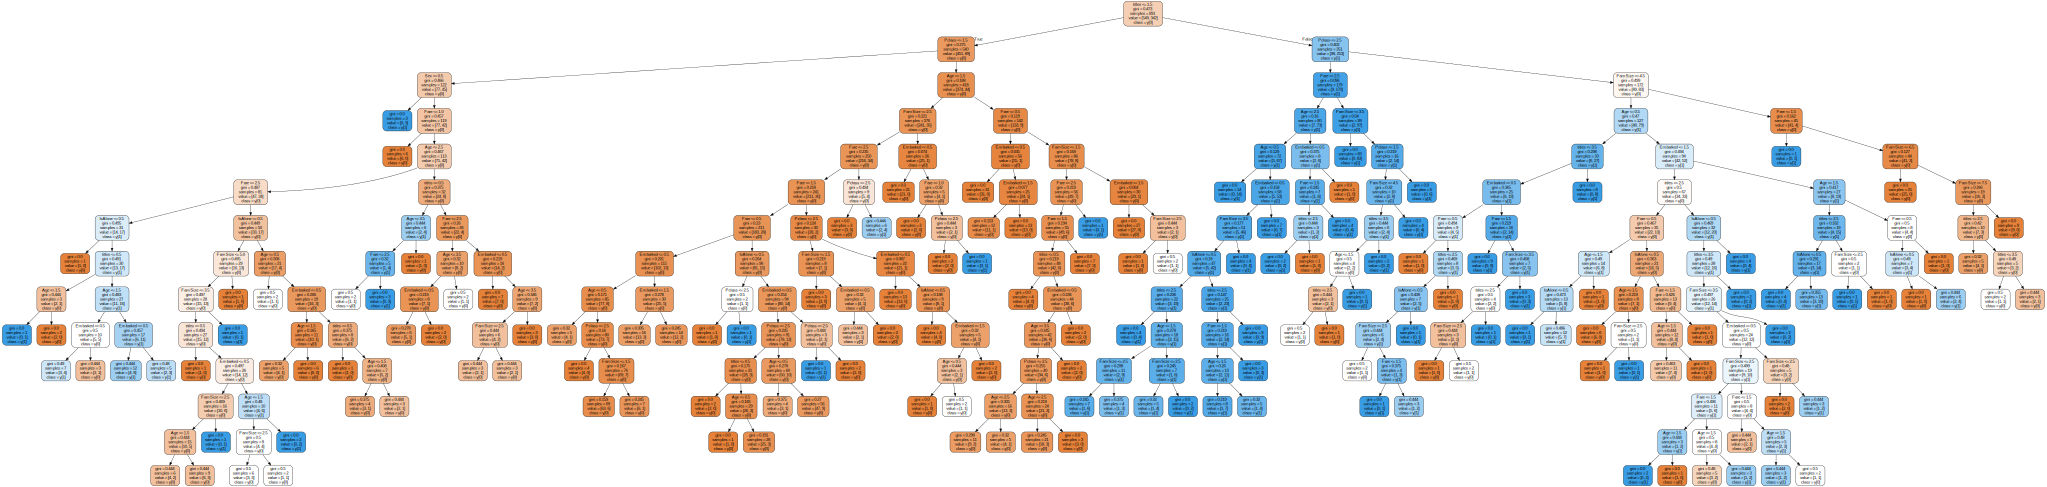

In [159]:
# plotting decision tree
import graphviz

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                               feature_names = X_train.columns.values, class_names = True,
                               filled = True, rounded = True)

graph = graphviz.Source(dot_data)
graph

In [160]:
vote_est = [
    #Ensemble Methods
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc',  ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    ('lr', linear_model.LogisticRegressionCV()),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    ('knn',neighbors.KNeighborsClassifier()),
    
    #SVM
    ('svc', svm.SVC(probability=True)),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
#     #Trees    
#     tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
#     #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    ('xgb', XGBClassifier())    
    ]



In [161]:
# Hard vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train, cv = cv_split)
vote_hard.fit(X_train, y_train)

In [166]:
# Soft vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train, cv = cv_split)
vote_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)), ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimator...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [167]:
print('Hard voting training score mean:{:0.2f}'.format((vote_hard_cv['train_score'].mean())*100))
print('Hard voting testing score mean:{:0.2f}'.format((vote_hard_cv['test_score'].mean())*100))
print('Hard voting testing score 3*std: +/- {:0.2f}'.format((vote_hard_cv['test_score'].std())*100*3))
print('-'*50)
print('Soft voting training score mean:{:0.2f}'.format((vote_soft_cv['train_score'].mean())*100))
print('Soft voting testing score mean:{:0.2f}'.format((vote_soft_cv['test_score'].mean())*100))
print('Soft voting testing score 3*std: +/- {:0.2f}'.format((vote_soft_cv['test_score'].std())*100*3))
print('-'*50)

Hard voting training score mean:85.92
Hard voting testing score mean:81.75
Hard voting testing score 3*std: +/- 6.50
--------------------------------------------------
Soft voting training score mean:86.50
Soft voting testing score mean:81.90
Soft voting testing score 3*std: +/- 6.72
--------------------------------------------------


In [168]:
#Hyperparameter Tune with GridSearchCV
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5,10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

In [184]:
grid_param = [
    [{
        #AdaBoostClassifier
        'n_estimators': grid_n_estimator,
        'learning_rate': grid_learn,
        'random_state': grid_seed
    }],
    
    [{
         #BaggingClassifier
        'n_estimators': grid_n_estimator,
      #  'criterion': grid_criterion,
        'max_samples': grid_ratio,
        'random_state': grid_seed
    }],
    
    [{
        #ExtraTreesClassifier
        'n_estimators': grid_n_estimator,
        'criterion': grid_criterion,
        'max_depth': grid_max_depth,
        'random_state': grid_seed
        
    }],
    
    [{
       #GradientBoostingClassifier
        'n_estimators': [300],
        'learning_rate': [0.05],
        'max_depth': grid_max_depth,
        'random_state': grid_seed
    }],
    
    [{
        #RandomForestClassifier
        'n_estimators': grid_n_estimator,
        'criterion': grid_criterion,
        'max_depth': grid_max_depth,
        'oob_score': [True],
        'random_state': grid_seed
    }],
    
    [{
        #GaussianProcessClassifier
        'max_iter_predict': grid_n_estimator,
        'random_state': grid_seed
    }],
    
    [{
        #LogisticRegressionCV
        'fit_intercept': grid_bool,
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'random_state': grid_seed
    }],
    
    [{
        #BernoulliNB
        'alpha': grid_ratio        
    }],
    
    [{
        #GaussianNB
    }],
    
    
    [{
        #KNeighborsClassifier
        'n_neighbors': [1,2,3,4,5,6,7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }],
    
    [{
        #SVC
        'C': [1,2,3,4,5],
        'gamma': grid_ratio,
        'decision_function_shape': ['ovo', 'ovr'],
        'probability': [True],
        'random_state': grid_seed
    }],
    
    [{
        #XGBClassifier
        'learning_rate': grid_learn,
        'max_depth':[1,2,4,6,8,10],
        'n_estimators': grid_n_estimator,
        'seed': grid_seed
    }],
]

In [185]:
start_total = time.perf_counter()

for clf, param in zip(vote_est, grid_param):
    start = time.perf_counter()
    
    best_search = model_selection.GridSearchCV(estimator= clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc', n_jobs = 3)
    best_search.fit(X_train, y_train)
    
    run = time.perf_counter() - start
    best_param = best_search.best_params_
    
    print('The best parameter for {} is {} with a runtime of {:0.2f} seconds.'. format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)

run_total = time.perf_counter() - start_total
print('Total optimization time {:0.2f} minutes'. format(run_total/60))
print('-'*50)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 50, 'random_state': 0} with a runtime of 60.68 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 51.36 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50, 'random_state': 0} with a runtime of 102.80 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 85.11 seconds.


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used 

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used 

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used 

The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 127.61 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 20.23 seconds.


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'sag'} with a runtime of 25.37 seconds.
The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.80 seconds.
The best parameter for GaussianNB is {} with a runtime of 0.12 seconds.
The best parameter for KNeighborsClassifier is {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 15.36 seconds.
The best parameter for SVC is {'C': 4, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 54.10 seconds.
The best parameter for XGBClassifier is {'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 10, 'seed': 0} with a runtime of 164.52 seconds.
Total optimization time 11.80 minutes
--------------------------------------------------


In [181]:
#ensemble.BaggingClassifier?

In [193]:
grid_hard = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train , cv = cv_split)
grid_hard.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=50, random_state=0)), ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.1,
         n_estimators=...=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [191]:
grid_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train , cv = cv_split)
grid_soft.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\dell\Anaconda3\lib\site-p

VotingClassifier(estimators=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=50, random_state=0)), ('bc', BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.1,
         n_estimators=...=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [194]:
print('Hard voting tuned hyperparameters training score mean:{:0.2f}'.format((grid_hard_cv['train_score'].mean())*100))
print('Hard voting tuned hyperparameters testing score mean:{:0.2f}'.format((grid_hard_cv['test_score'].mean())*100))
print('Hard voting tuned hyperparameters testing score 3*std: +/- {:0.2f}'.format((grid_hard_cv['test_score'].std())*100*3))
print('-'*50)
print('Soft voting tuned hyperparameters training score mean:{:0.2f}'.format((grid_soft_cv['train_score'].mean())*100))
print('Soft voting tuned hyperparameters testing score mean:{:0.2f}'.format((grid_soft_cv['test_score'].mean())*100))
print('Soft voting tuned hyperparameters testing score 3*std: +/- {:0.2f}'.format((grid_soft_cv['test_score'].std())*100*3))
print('-'*50)

Hard voting tuned hyperparameters training score mean:84.77
Hard voting tuned hyperparameters testing score mean:82.35
Hard voting tuned hyperparameters testing score 3*std: +/- 6.33
--------------------------------------------------
Soft voting tuned hyperparameters training score mean:84.40
Soft voting tuned hyperparameters testing score mean:82.72
Soft voting tuned hyperparameters testing score 3*std: +/- 7.53
--------------------------------------------------


In [209]:
test_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [199]:
test_F['Survived'] = grid_hard.predict(X_test)

In [210]:
# match the index for copying purpose
test_F.index = test_T.index
test_F['PassengerId'] = test_T.PassengerId

In [212]:
test_F.sample(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,titles,FamSize,IsAlone,PassengerId
103,0.0,3,1,1,0,0,1,1,1,995
417,1.0,3,1,0,2,1,4,3,0,1309
221,0.0,3,1,1,1,0,1,1,1,1113
222,1.0,2,0,1,1,0,3,1,1,1114
351,0.0,2,1,1,1,0,1,1,1,1243
378,0.0,1,1,3,3,0,1,1,1,1270
126,0.0,3,1,1,0,0,1,1,1,1018
226,0.0,3,1,1,0,0,1,1,1,1118
7,0.0,2,1,1,2,0,1,3,0,899
362,1.0,2,0,1,2,0,3,1,1,1254


In [213]:
submit = test_F[['PassengerId', 'Survived']]

In [215]:
print('Test data distribution: \n', test_F['Survived'].value_counts(normalize = True))

Test data distribution: 
 0.0    0.617225
1.0    0.382775
Name: Survived, dtype: float64
